In [1]:
import neat
import os
import evogym.envs
from evogym import is_connected, has_actuator, get_full_connectivity, hashable
import numpy as np
import dill
import pickle as pkl
import sys
sys.path.append('../')

from hyperneat.new_hyperNEAT import create_phenotype_network
from hyperneat.substrate import Substrate
from hyperneat.visualize import draw_net
from dynamic_env_v2.traverser import DynamicObstacleTraverser


import itertools as it
import time
import imageio

from matplotlib import pyplot as plt


from sgr.substrates import morph_substrate, control_substrate
from sgr.generate_robot import generate_robot, eval_robot_constraint
from sgr.evogym_sim import simulate_env
from sgr.body_speciation import CustomGenome


In [3]:
def get_robot(genome, robot_size, neat_config, env_config):
    if genome.robot is not None:
        robot = genome.robot
    else:
        cppn = neat.nn.FeedForwardNetwork.create(genome, neat_config)
        design_substrate = morph_substrate(robot_size)
        design_net = create_phenotype_network(cppn, design_substrate)
        robot = generate_robot(design_net, robot_size)
        print(robot)

    if not eval_robot_constraint(robot):
        return robot, None
    connections = get_full_connectivity(robot)

    
    env = DynamicObstacleTraverser(body=robot, connections=connections, env_config=env_config)
    img = env.render(mode='img')
    env.close()
    return robot, img

In [4]:
# STEPS = 400
# ROBOT_SIZE = 5
# POP = 48

# directory = "results/" + ENV

# params = {"robot_size": ROBOT_SIZE, "env": "dynamic", "steps": STEPS, "pop_size": POP}

# morphology_coords = morph_substrate(ROBOT_SIZE)
# CustomGenome.robot_func = lambda self, net, params: generate_robot(net, ROBOT_SIZE)
# CustomGenome.substrate = morphology_coords
# CustomGenome.robot_size = ROBOT_SIZE


# neat_config = neat.config.Config(
#     CustomGenome,
#     neat.reproduction.DefaultReproduction, 
#     neat.species.DefaultSpeciesSet, 
#     neat.stagnation.DefaultStagnation, 
#     "../neat_configs/POET.cfg"
# )

# input_size = morphology_coords.dimensions*2 + 1 # two coordinates plus the bias
# neat_config.genome_config.num_inputs = input_size
# neat_config.genome_config.input_keys = [-1*i for i in range(1, input_size+1)]
# neat_config.genome_config.num_outputs = 1
# neat_config.genome_config.output_keys = [1]

with open(f"../poet/cp_3d_5_mult_out_300.pkl", "rb") as file:
    poet_pop = pkl.load(file)
    
CustomGenome.robot_func = lambda self, net, config: generate_robot(net, poet_pop.run_params.robot_size)
CustomGenome.substrate = morph_substrate(poet_pop.run_params.robot_size, poet_pop.run_params.substrate_type)
CustomGenome.robot_size = poet_pop.run_params.robot_size
CustomGenome.spec_genotype_weight = poet_pop.run_params.spec_genotype_weight
CustomGenome.spec_phenotype_weight = poet_pop.run_params.spec_phenotype_weight

In [7]:
def show_img(ag, min_fit, robot_size, neat_config, env_config):
    if ag.fitness is not None and ag.fitness > min_fit:
        r, img = get_robot(ag, robot_size, neat_config, env_config)
        if img is not None:
            print(ag.key, ag.fitness)
            plt.imshow(img)
            plt.show()
            net = neat.nn.FeedForwardNetwork.create(ag, neat_config)
            display(draw_net(net))




###################### Pair (env: 0, pop: 0) ########################

------------- Champion ----------------
14171 4.8817429234960645


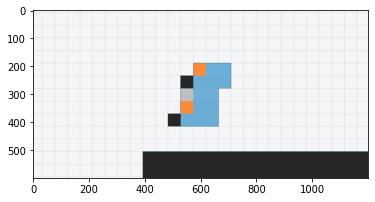

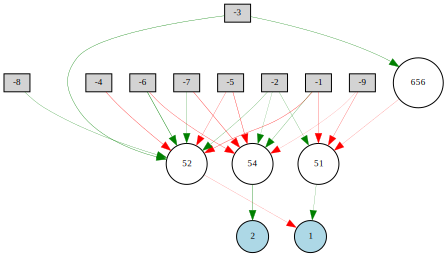



###################### Pair (env: 28, pop: 28) ########################

------------- Champion ----------------
11581 4.3769859336303005


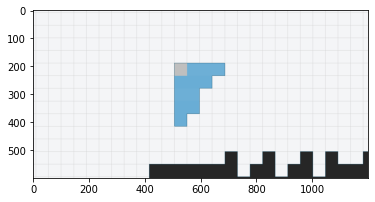

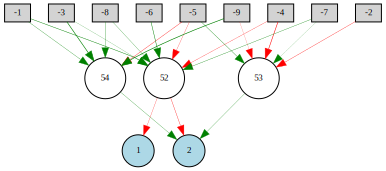



###################### Pair (env: 30, pop: 30) ########################

------------- Champion ----------------
13727 3.8454583109843785


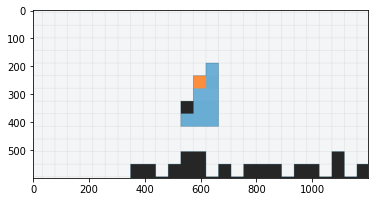

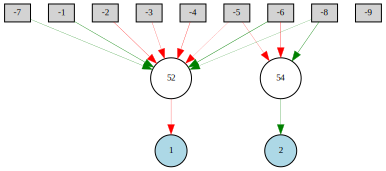



###################### Pair (env: 13, pop: 13) ########################

------------- Champion ----------------
11036 4.449106109705133


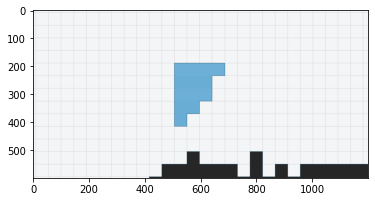

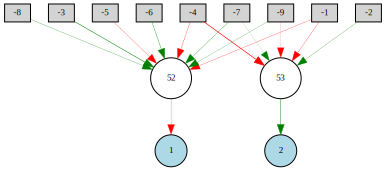



###################### Pair (env: 50, pop: 107) ########################

------------- Champion ----------------
13819 4.711320805384825


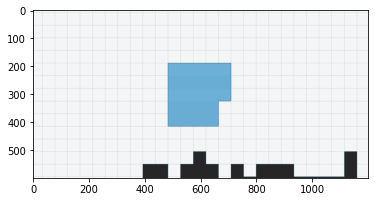

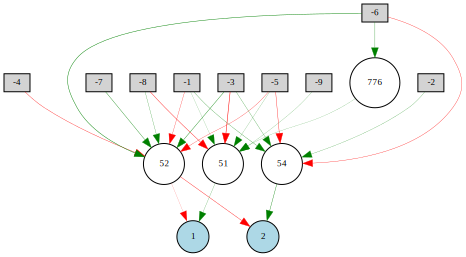



###################### Pair (env: 49, pop: 103) ########################

------------- Champion ----------------
12231 3.784168421230665


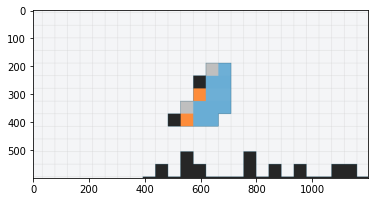

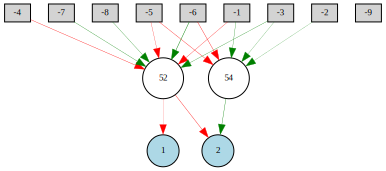



###################### Pair (env: 46, pop: 91) ########################

------------- Champion ----------------
11798 4.456148296968885


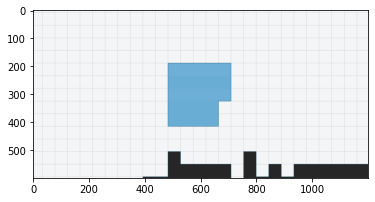

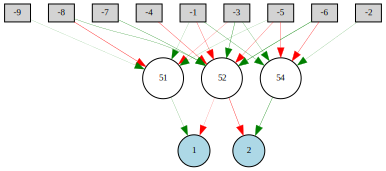

In [8]:
for p in poet_pop.pairs:
    pop = p.agent_pop
    env = p.environment
    print(f"\n\n###################### Pair (env: {env.id}, pop: {pop.id}) ########################\n")
    
    # for ag_id, ag in pop.pop.population.items():
    #     show_img(ag, 2, pop.robot_size, pop.neat_config)
    
    print("------------- Champion ----------------")
    show_img(pop.pop.best_genome, -1, pop.robot_size, pop.neat_config, env)

In [9]:
STEPS = 400
env_dict = {}
ag_dict = {}
for p in poet_pop.pairs:
    pop = p.agent_pop
    env = p.environment
    print(env.heights_list)
    for ag_id, ag in pop.pop.population.items():
        ag_dict[ag_id] = (ag, pop)
    env_dict[env.id] = env



[5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5]
[5 5 5 5 5 5 6 4 5 6 4 5 6 4 6 5 5 6 4 4 6 5 5 6 6 5 6 5 5 5 5 4 5 5 4 5 5
 5 5 5 6 5 4 5 5 5 5 5 5 5 5 4 6 5 5 5 5 4 5 6]
[5 5 4 5 6 6 4 5 4 5 5 5 4 5 5 4 6 4 5 5 6 4 5 5 5 6 4 5 5 5 5 5 4 5 5 6 5
 5 5 5 6 5 6 4 6 5 5 5 5 4 5 6 5 5 5 5 5 5 4 5]
[4 5 5 6 5 5 5 4 6 4 5 4 5 5 5 5 5 5 5 5 5 5 6 5 5 5 5 4 6 5 6 5 6 5 5 5 4
 4 5 5 5 5 5 5 4 5 4 5 5 6 6 5 6 5 4 4 5 4 5 5]
[5 5 3 5 6 5 3 5 4 5 5 5 4 4 4 4 6 3 5 4 6 4 5 6 5 6 4 5 5 4 6 5 4 5 5 6 5
 6 5 6 6 6 6 3 6 5 5 4 5 4 5 6 4 6 5 5 4 5 5 5]
[4 5 4 6 5 4 4 4 6 4 5 4 5 4 4 5 5 4 5 4 5 5 6 6 5 5 5 4 6 4 7 5 6 5 5 5 4
 5 5 6 5 6 5 4 4 5 4 4 5 6 6 5 5 6 4 4 4 4 6 5]
[4 4 6 5 5 5 5 3 6 4 5 4 5 5 5 5 5 5 5 6 5 4 6 5 4 5 5 4 6 6 6 5 6 5 4 4 4
 4 6 5 4 5 5 5 4 5 4 5 6 6 6 5 6 4 4 4 5 4 5 4]


In [15]:
def show_exec(ag_id, env_id):
    ag, pop = ag_dict[ag_id]
    reward, done = pop.single_genome_fit(ag, STEPS, "dynamic", env_dict[env_id], True, None)
    return reward, done

In [16]:
r, d = show_exec(12231, 49)
print(r)

2.404082688746779


In [9]:
env_id = 98
env1 = poet_pop.mutate(env_dict[env_id])
env2 = poet_pop.mutate(env_dict[env_id])

print(env_dict[env_id].obstacle_prob)
print(env1.obstacle_prob, env2.obstacle_prob)

KeyError: 98

In [ ]:
# poet_pop.create_environments()